## **[Github source](https://github.com/weijie-chen/Linear-Algebra-With-Python/tree/master/notebooks)**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
sy.init_printing()
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

We begin by exploring the fundamentals of plotting in Python, while simultaneously revisiting the concept of systems of linear equations.

# <font face="gotham" color="purple"> Visualisation of A System of Two Linear Equations </font>

Consider a linear system of two equations:
\begin{align}
x+y&=6\\
x-y&=-4
\end{align}
Easy to solve: $(x, y)^T = (1, 5)^T$. Let's plot the linear system.

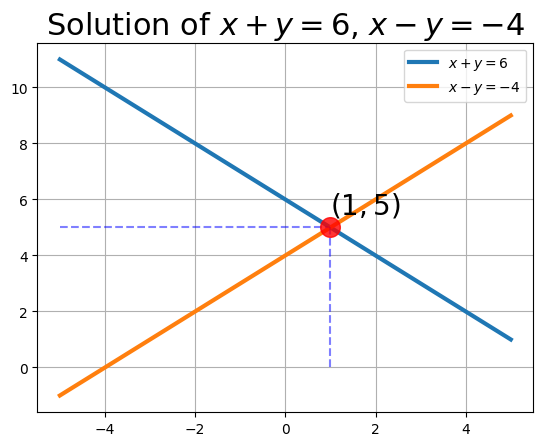

In [5]:
x = np.linspace(-5, 5, 100)
y1 = -x + 6
y2 = x + 4

fig, ax = plt.subplots()
ax.scatter(1, 5, s = 200, zorder=5, color = 'r', alpha = .8)

ax.plot(x, y1, lw =3, label = '$x+y=6$')
ax.plot(x, y2, lw =3, label = '$x-y=-4$')
ax.plot([1, 1], [0, 5], ls = '--', color = 'b', alpha = .5)
ax.plot([-5, 1], [5, 5], ls = '--', color = 'b', alpha = .5)
# ax.set_xlim([-5, 5])
# ax.set_ylim([0, 12])

ax.legend()
s = '$(1,5)$'
ax.text(1, 5.5, s, fontsize = 20)
ax.set_title('Solution of $x+y=6$, $x-y=-4$', size = 22)
ax.grid()

# <font face="gotham" color="purple"> How to Draw a Plane </font>

Before drawing a plane, let's refresh the logic of Matplotlib 3D plotting. This should be familiar to you if you are a MATLAB user.

First, create meshgrids.

In [37]:
x, y = [-1, 0, 1], [-1, 0, 1]
X, Y = np.meshgrid(x, y)

In [38]:
Y

array([[-1, -1, -1],
       [ 0,  0,  0],
       [ 1,  1,  1]])

Mathematically, meshgrids are the coordinates of _Cartesian products_. To illustrate, we can plot all the coordinates of these meshgrids

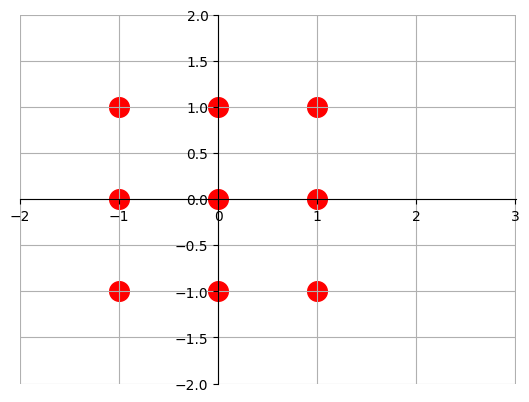

In [31]:
fig, ax = plt.subplots()
ax.scatter(X, Y, s = 200, color = 'red')
ax.axis([-2, 3.01, -2.01, 2])
ax.spines['left'].set_position('zero') # alternative position is 'center'
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid()
plt.show()

Try a more complicated meshgrid.

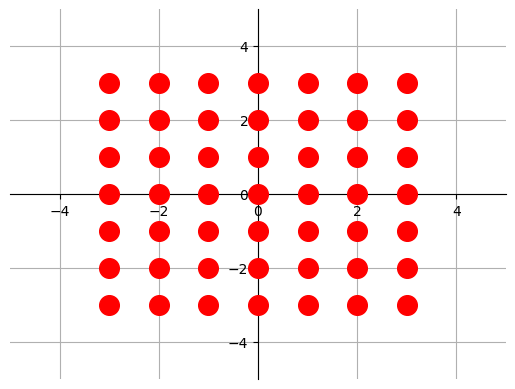

In [40]:
x, y = np.arange(-3, 4, 1), np.arange(-3, 4, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()
ax.scatter(X, Y, s = 200, color = 'red', zorder = 3)
ax.axis([-5, 5, -5, 5])

ax.spines['left'].set_position('zero') # alternative position is 'center'
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid()

Now consider the function $z = f(x, y)$, $z$ is in the $3rd$ dimension. Though Matplotlib is not meant for delicate plotting of 3D graphics, basic 3D plotting is still acceptable.

For example, we define a simple plane as
$$z= x + y$$
Then plot $z$

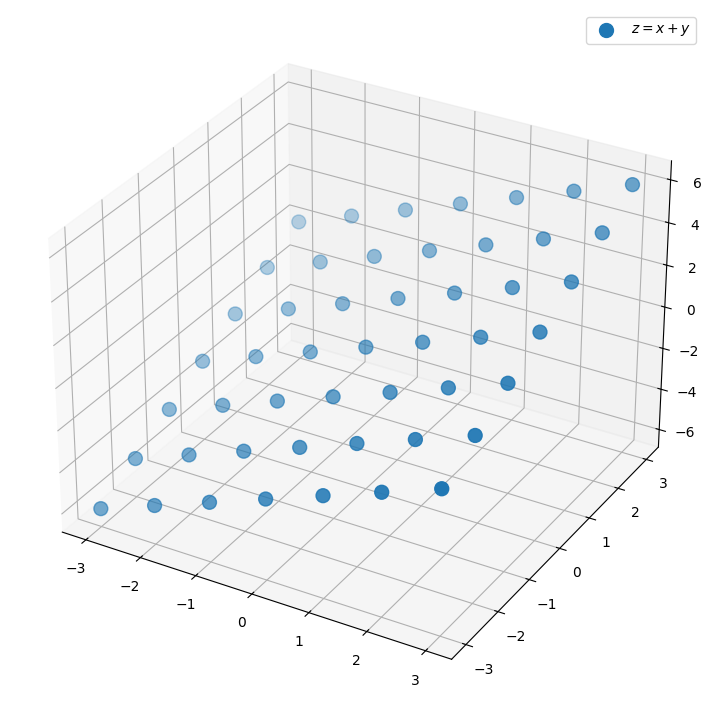

In [41]:
Z = X + Y
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X, Y, Z, s = 100, label = '$z=x+y$')
ax.legend()
plt.show()

Or we can plot it as a surface, Matplotlib will automatically interpolate values among the Cartesian coordinates such that the graph will look like a surface.

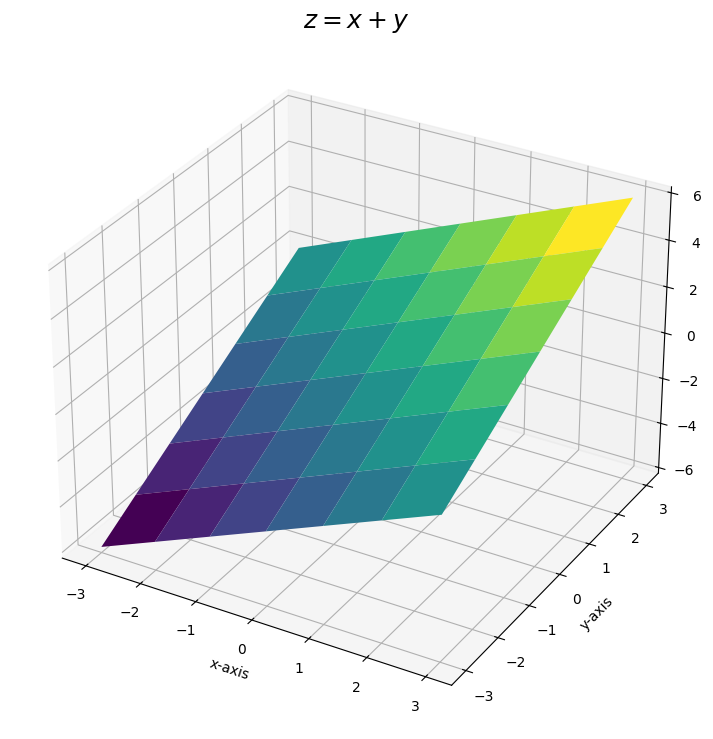

In [42]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap ='viridis') # MATLAB default color map
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('$z=x+y$', size = 18)
plt.show()

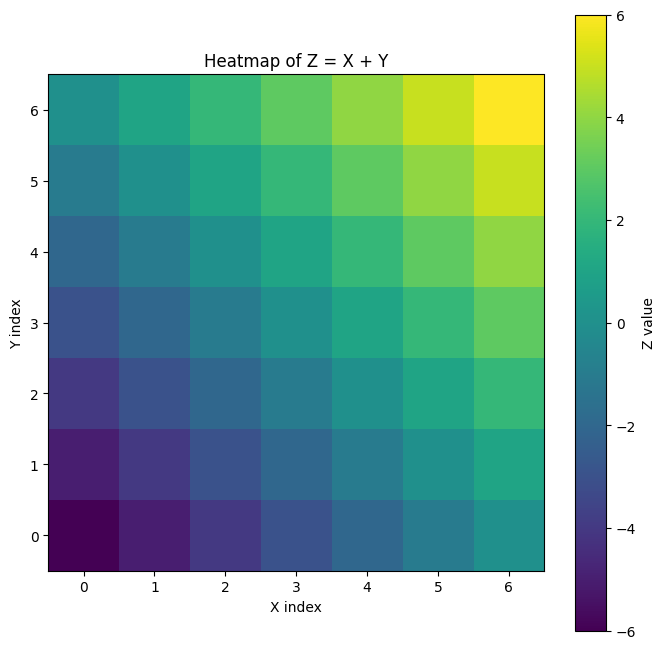

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))
heatmap = ax.imshow(Z, cmap='viridis', origin='lower')
plt.colorbar(heatmap, ax=ax, label='Z value')
ax.set_title('Heatmap of Z = X + Y')
ax.set_xlabel('X index')
ax.set_ylabel('Y index')
plt.show()

In [45]:
X

array([[-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3]])

In [46]:
Y

array([[-3, -3, -3, -3, -3, -3, -3],
       [-2, -2, -2, -2, -2, -2, -2],
       [-1, -1, -1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3]])

In [43]:
Z

array([[-6, -5, -4, -3, -2, -1,  0],
       [-5, -4, -3, -2, -1,  0,  1],
       [-4, -3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2,  3],
       [-2, -1,  0,  1,  2,  3,  4],
       [-1,  0,  1,  2,  3,  4,  5],
       [ 0,  1,  2,  3,  4,  5,  6]])

# <font face="gotham" color="purple"> Visualisation of A System of Three Linear Equations  </font>

We have reviewed on plotting planes, now we are ready to plot several planes all together.

Consider this system of linear equations
\begin{align}
x_1- 2x_2+x_3&=0\\
2x_2-8x_3&=8\\
-4x_1+5x_2+9x_3&=-9
\end{align}
And solution is $(x_1, x_2, x_3)^T = (29, 16, 3)^T$. Let's reproduce the system visually.

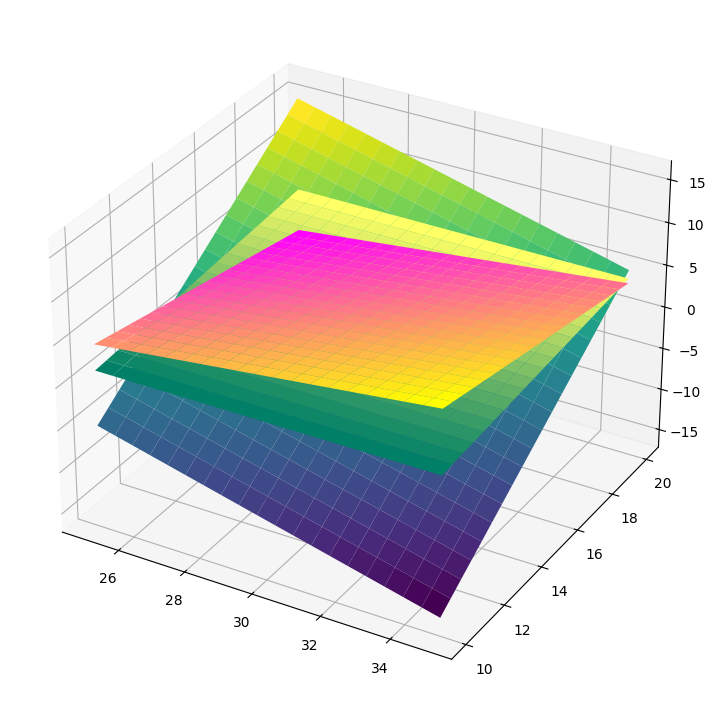

In [52]:
x1 = np.linspace(25, 35, 20)
x2 = np.linspace(10, 20, 20)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

X3 = 2*X2 - X1
ax.plot_surface(X1, X2, X3, cmap ='viridis', alpha = 1)

X3 = .25*X2 - 1
ax.plot_surface(X1, X2, X3, cmap ='summer', alpha = 1)

X3 = -5/9*X2 + 4/9*X1 - 1
ax.plot_surface(X1, X2, X3, cmap ='spring', alpha = 1)

ax.scatter(29, 16, 3, s = 200, color = 'black')
plt.show()

We are certain there is a solution, however the graph does not show the intersection of planes. The problem originates from Matplotlib's rendering algorithm, which is not designed for drawing genuine 3D graphics. It merely projects 3D objects onto 2D dimension to imitate 3D features.



## <font face="gotham" color="purple"> Visualisation of A System With Infinite Numbers of Solutions </font>

Our system of equations is given

\begin{align}
y-z=&4\\
2x+y+2z=&4\\
2x+2y+z=&8
\end{align}

Rearrange to solve for $z$

\begin{align}
z=&y-4\\
z=&2-x-\frac{y}{2}\\
z=&8-2x-2y
\end{align}

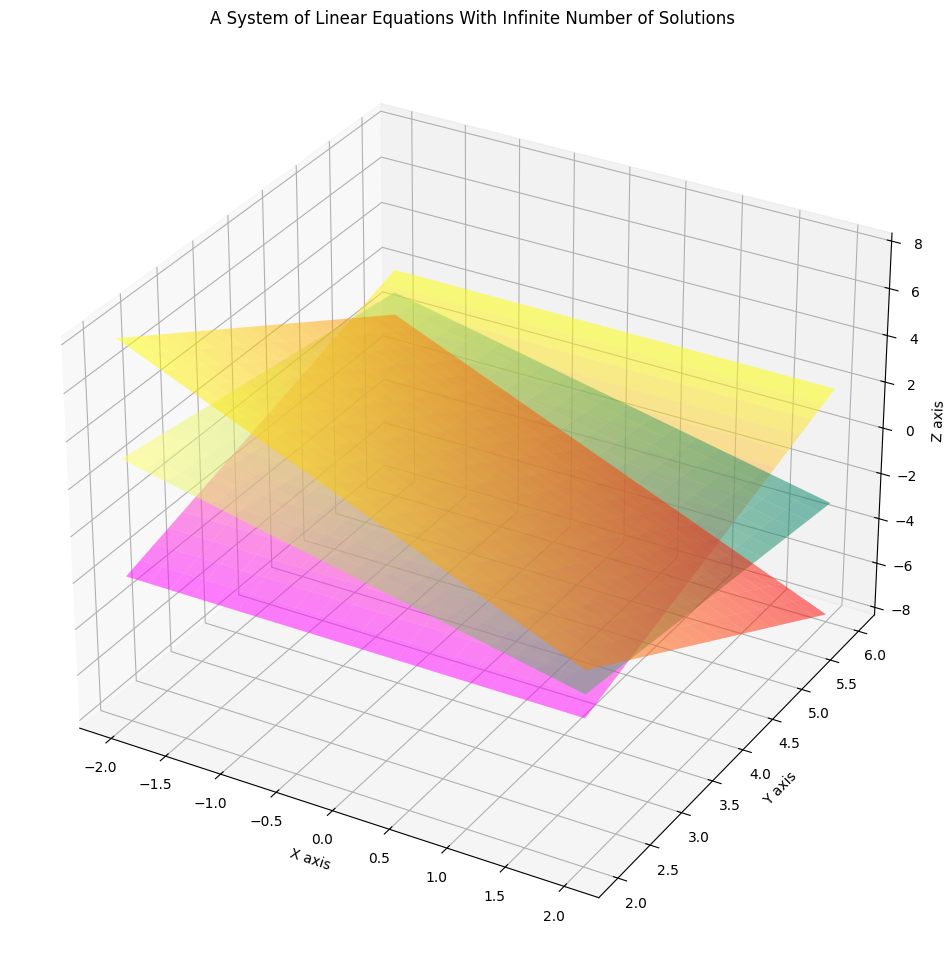

In [53]:

# Create the figure and a 3D axis
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Create the grid
X, Y = np.mgrid[-2:2:21j, 2:6:21j]

# Plot the first plane
Z1 = Y - 4
ax.plot_surface(X, Y, Z1, cmap='spring', alpha=0.5)

# Plot the second plane
Z2 = 2 - X - Y/2
ax.plot_surface(X, Y, Z2, cmap='summer', alpha=0.5)

# Plot the third plane
Z3 = 8 - 2*X - 2*Y
ax.plot_surface(X, Y, Z3, cmap='autumn', alpha=0.5)


# Add axes labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Add title
plt.title('A System of Linear Equations With Infinite Number of Solutions')

# Show the plot
plt.show()

The solution of the system is $(x,y,z)=(-3z/2,z+4,z)^T$, where $z$ is a **free variable**.

The solution is an infinite line in $\mathbb{R}^3$, to visualise the solution requires setting a range of $x$ and $y$, for instance we can set

\begin{align}
-2 \leq x \leq 2\\
2 \leq y \leq 6
\end{align}

which means

\begin{align}
-2\leq -\frac32z\leq 2\\
2\leq z+4 \leq 6
\end{align}

We can pick one inequality to set the range of $z$, e.g. second inequality: $-2 \leq z \leq 2$.

Then plot the planes and the solutions together.

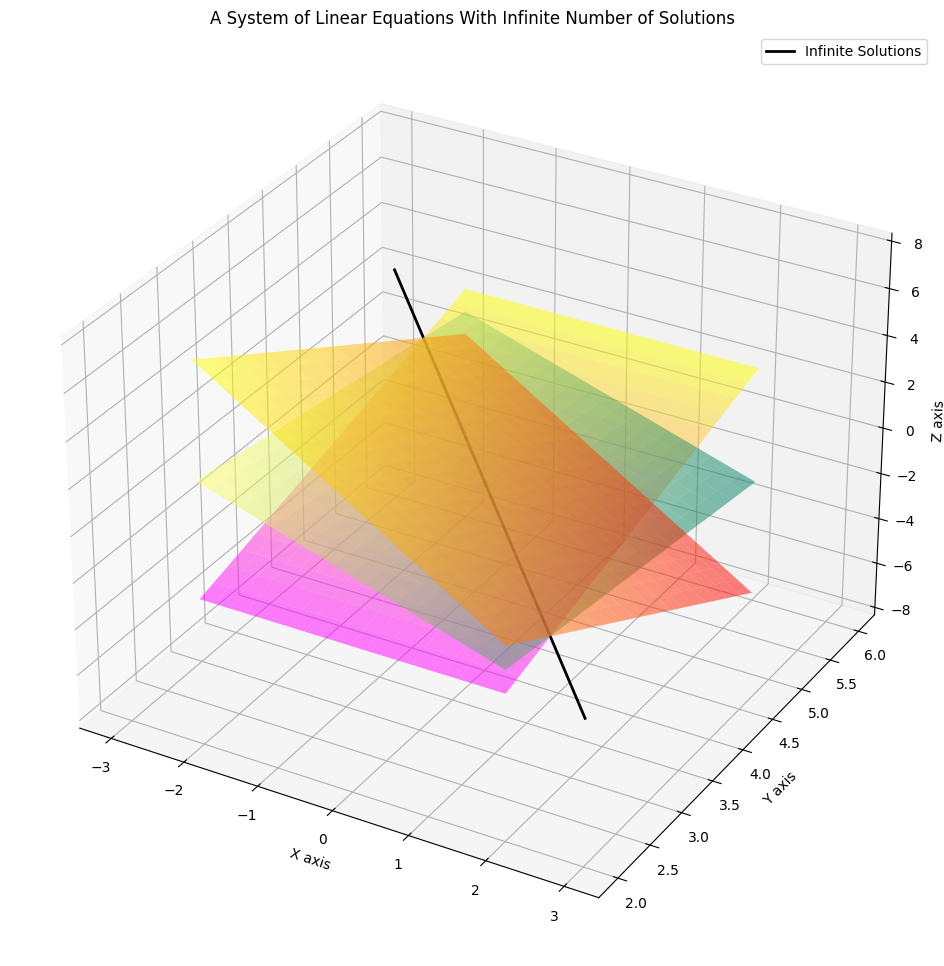

In [54]:

# Create the figure and a 3D axis
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Create the grid
X, Y = np.mgrid[-2:2:21j, 2:6:21j]

# Plot the first plane
Z1 = Y - 4
ax.plot_surface(X, Y, Z1, cmap='spring', alpha=0.5)

# Plot the second plane
Z2 = 2 - X - Y / 2
ax.plot_surface(X, Y, Z2, cmap='summer', alpha=0.5)

# Plot the third plane
Z3 = 8 - 2 * X - 2 * Y
ax.plot_surface(X, Y, Z3, cmap='autumn', alpha=0.5)

# Define the line of infinite solutions
ZL = np.linspace(-2, 2, 20)  # ZL means Z for line, chosen range [-2, 2]
XL = -3 * ZL / 2
YL = ZL + 4

# Plot the line
ax.plot(XL, YL, ZL, color='black', linewidth=2, label='Infinite Solutions')

# Add axes labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Add title and legend
plt.title('A System of Linear Equations With Infinite Number of Solutions')
ax.legend()

# Show the plot
plt.show()

# <font face="gotham" color="purple"> Reduced Row Echelon Form </font>

For easy demonstration, we will be using SymPy frequently in lectures. SymPy is a very power symbolic computation library, we will see its basic features as the lectures move forward.

We define a SymPy matrix:

In [ ]:
M = sy.Matrix([[5, 0, 11, 3], [7, 23, -3, 7], [12, 11, 3, -4]]); M

⎡5   0   11  3 ⎤
⎢              ⎥
⎢7   23  -3  7 ⎥
⎢              ⎥
⎣12  11  3   -4⎦

Think of it as an _augmented matrix_ which combines coefficients of linear system. With row operations, we can solve the system quickly. Let's turn it into a _row reduced echelon form_.

In [ ]:
M_rref = M.rref(); M_rref # .rref() is the SymPy method for row reduced echelon form

⎛⎡         -2165 ⎤           ⎞
⎜⎢1  0  0  ──────⎥           ⎟
⎜⎢          1679 ⎥           ⎟
⎜⎢               ⎥           ⎟
⎜⎢          1358 ⎥           ⎟
⎜⎢0  1  0   ──── ⎥, (0, 1, 2)⎟
⎜⎢          1679 ⎥           ⎟
⎜⎢               ⎥           ⎟
⎜⎢          1442 ⎥           ⎟
⎜⎢0  0  1   ──── ⎥           ⎟
⎝⎣          1679 ⎦           ⎠

Take out the first element in the big parentheses, i.e. the rref matrix.

In [ ]:
M_rref = np.array(M_rref[0]); M_rref

array([[1, 0, 0, -2165/1679],
       [0, 1, 0, 1358/1679],
       [0, 0, 1, 1442/1679]], dtype=object)

If you don't like fractions, convert it into float type.

In [ ]:
M_rref.astype(float)

array([[ 1.   ,  0.   ,  0.   , -1.289],
       [ 0.   ,  1.   ,  0.   ,  0.809],
       [ 0.   ,  0.   ,  1.   ,  0.859]])

The last column of the rref matrix is the solution of the system.

## <font face="gotham" color="purple"> Example: rref and Visualisation </font>

Let's use ```.rref()``` method to compute a solution of a system then visualise it. Consider the system:

\begin{align}
3x+6y+2z&=-13\\
x+2y+z&=-5\\
-5x-10y-2z&=19
\end{align}

Extract the augmented matrix into a SymPy matrix:

In [ ]:
A = sy.Matrix([[3, 6, 2, -13], [1, 2, 1, -5], [-5, -10, -2, 19]]); A

⎡3    6   2   -13⎤
⎢                ⎥
⎢1    2   1   -5 ⎥
⎢                ⎥
⎣-5  -10  -2  19 ⎦

In [ ]:
A_rref = A.rref(); A_rref

⎛⎡1  2  0  -3⎤        ⎞
⎜⎢           ⎥        ⎟
⎜⎢0  0  1  -2⎥, (0, 2)⎟
⎜⎢           ⎥        ⎟
⎝⎣0  0  0  0 ⎦        ⎠

In case you are wondering what's $(0, 2)$: they are the indices of pivot columns, in the augmented matrix above, the pivot columns reside on the $0$-th and $2$-nd column.

Given that the matrix is not of full rank, the solutions are expressed in a general form:
\begin{align}
x + 2y & = -3\\
z &= -2\\
y &= \text{free variable}
\end{align}
To illustrate, let's select three distinct values for $y$, specifically $(3, 5, 7)$, and compute three unique solutions:

In [ ]:
point1 = (-2*3-3, 3, -2)
point2 = (-2*5-3, 5, -2)
point3 = (-2*7-3, 7, -2)
special_solution = np.array([point1, point2, point3]); special_solution # each row is a special solution

array([[ -9,   3,  -2],
       [-13,   5,  -2],
       [-17,   7,  -2]])

We can visualise the general solution, and the 3 specific solutions altogether.

In [ ]:
y = np.linspace(2, 8, 20) # y is the free variable
x = -3 - 2*y
z = np.full((len(y), ), -2) # z is a constant

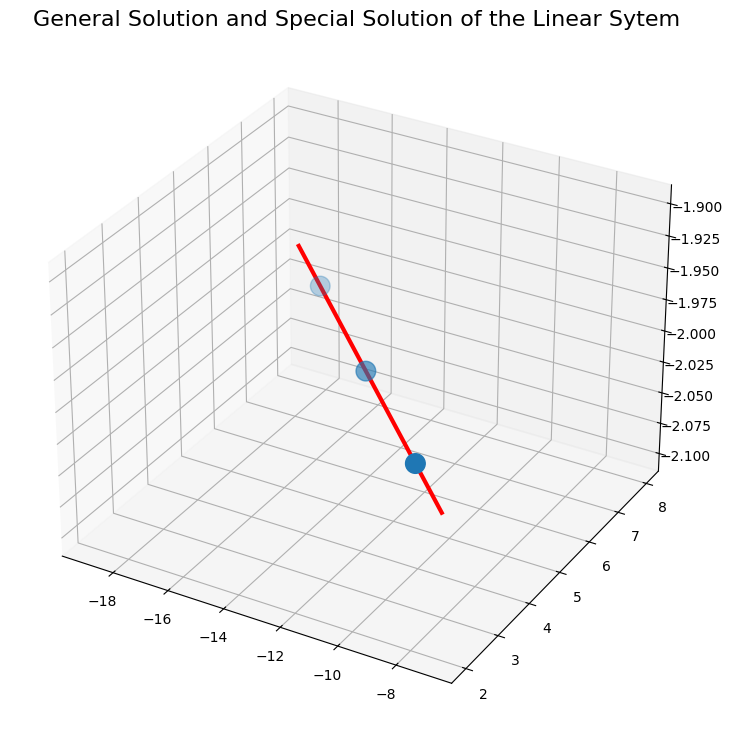

In [ ]:
fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw = 3, color = 'red')
ax.scatter(special_solution[:,0], special_solution[:,1], special_solution[:,2], s = 200)
ax.set_title('General Solution and Special Solution of the Linear Sytem', size= 16)
plt.show()

## <font face="gotham" color="purple"> Example: A Symbolic Solution </font>

Consider a system where all right-hand side values are indeterminate:

\begin{align}
x + 2y - 3z &= a\\
4x - y + 8z &= b\\
2x - 6y - 4z &= c
\end{align}

We define $a, b, c$ as SymPy objects, then extract the augmented matrix

In [ ]:
a, b, c = sy.symbols('a, b, c', real = True)
A = sy.Matrix([[1, 2, -3, a], [4, -1, 8, b], [2, -6, -4, c]]); A

⎡1  2   -3  a⎤
⎢            ⎥
⎢4  -1  8   b⎥
⎢            ⎥
⎣2  -6  -4  c⎦

We can immediately achieve the symbolic solution by using ```.rref()``` method.

In [ ]:
A_rref = A.rref(); A_rref

⎛⎡            2⋅a   b   c    ⎤           ⎞
⎜⎢1  0  0     ─── + ─ + ──   ⎥           ⎟
⎜⎢             7    7   14   ⎥           ⎟
⎜⎢                           ⎥           ⎟
⎜⎢          16⋅a   b    10⋅c ⎥           ⎟
⎜⎢0  1  0   ──── + ── - ──── ⎥, (0, 1, 2)⎟
⎜⎢           91    91    91  ⎥           ⎟
⎜⎢                           ⎥           ⎟
⎜⎢           11⋅a   5⋅b   9⋅c⎥           ⎟
⎜⎢0  0  1  - ──── + ─── - ───⎥           ⎟
⎝⎣            91    91    182⎦           ⎠

Of course, we can substitute values of $a$, $b$ and $c$ to get a specific solution.

In [ ]:
spec_solution = {a: 3, b: 6, c: 7}
A_rref = A_rref[0].subs(spec_solution); A_rref # define a dictionary for special values to substitute in

⎡          31 ⎤
⎢1  0  0   ── ⎥
⎢          14 ⎥
⎢             ⎥
⎢         -16 ⎥
⎢0  1  0  ────⎥
⎢          91 ⎥
⎢             ⎥
⎢         -69 ⎥
⎢0  0  1  ────⎥
⎣         182 ⎦

## <font face="gotham" color="purple"> Example: Polynomials </font>

To determine a cubic polynomial that intersects the points $(1,3)$, $(2, -2)$, $(3, -5)$, and $(4, 0)$, we consider the general form of a cubic polynomial:

\begin{align}
y = a_0 + a_1x + a_2x^2 + a_3x^3
\end{align}

Substituting each point into this equation yields:

\begin{align}
3 &= a_0 + a_1(1) + a_2(1)^2 + a_3(1)^3 \\
-2 &= a_0 + a_1(2) + a_2(2)^2 + a_3(2)^3 \\
-5 &= a_0 + a_1(3) + a_2(3)^2 + a_3(3)^3 \\
0 &= a_0 + a_1(4) + a_2(4)^2 + a_3(4)^3
\end{align}


It turns to be a linear system, the rest should be familiar already.

The augmented matrix is

In [ ]:
A = sy.Matrix([[1, 1, 1, 1, 3], [1, 2, 4, 8, -2], [1, 3, 9, 27, -5], [1, 4, 16, 64, 0]]); A

⎡1  1  1   1   3 ⎤
⎢                ⎥
⎢1  2  4   8   -2⎥
⎢                ⎥
⎢1  3  9   27  -5⎥
⎢                ⎥
⎣1  4  16  64  0 ⎦

In [ ]:
A_rref = A.rref(); A_rref
poly_coef = [A_rref[0][i, -1] for i in range(A_rref[0].shape[0])]

The last column is the solution, i.e. the coefficients of the cubic polynomial.

Cubic polynomial form is:
$$
\begin{align}
y = 4 + 3x - 5x^2 + x^3
\end{align}
$$

Since we have the specific form of the cubic polynomial, we can plot it

In [ ]:
A_rref
x = np.linspace(-5, 5, 40)
y = poly_coef[0] + poly_coef[1]*x + poly_coef[2]*x**2 + poly_coef[3]*x**3

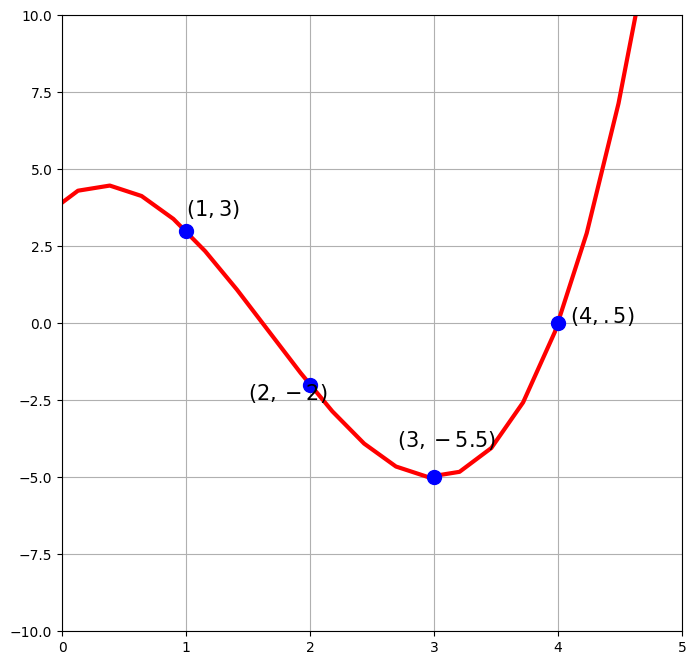

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y, lw = 3, color ='red')
ax.scatter([1, 2, 3, 4], [3, -2, -5, 0], s = 100, color = 'blue', zorder = 3)
ax.grid()
ax.set_xlim([0, 5])
ax.set_ylim([-10, 10])

ax.text(1, 3.5, '$(1, 3)$', fontsize = 15)
ax.text(1.5, -2.5, '$(2, -2)$', fontsize = 15)
ax.text(2.7, -4, '$(3, -5.5)$', fontsize = 15)
ax.text(4.1, 0, '$(4, .5)$', fontsize = 15)
plt.show()

Now you know the trick, try another 5 points: $(1,2)$, $(2,5)$, $(3,8)$, $(4,6)$, $(5, 9)$. And polynomial form is
$$
\begin{align}
y=a_0+a_1x+a_2x^2+a_3x^3+a_4x^4
\end{align}
$$
The augmented matrix is

In [ ]:
A = sy.Matrix([[1, 1, 1, 1, 1, 2],
               [1, 2, 4, 8, 16, 5],
               [1, 3, 9, 27, 81, 8],
               [1, 4, 16, 64, 256, 6],
               [1, 5, 25,125, 625, 9]]); A

⎡1  1  1    1    1   2⎤
⎢                     ⎥
⎢1  2  4    8   16   5⎥
⎢                     ⎥
⎢1  3  9   27   81   8⎥
⎢                     ⎥
⎢1  4  16  64   256  6⎥
⎢                     ⎥
⎣1  5  25  125  625  9⎦

In [ ]:
A_rref = A.rref()
A_rref = np.array(A_rref[0])
coef = A_rref.astype(float)[:,-1];coef

array([ 19.   , -37.417,  26.875,  -7.083,   0.625])

In [ ]:
x = np.linspace(0, 6, 100)
y = coef[0] + coef[1]*x + coef[2]*x**2 + coef[3]*x**3 + coef[4]*x**4

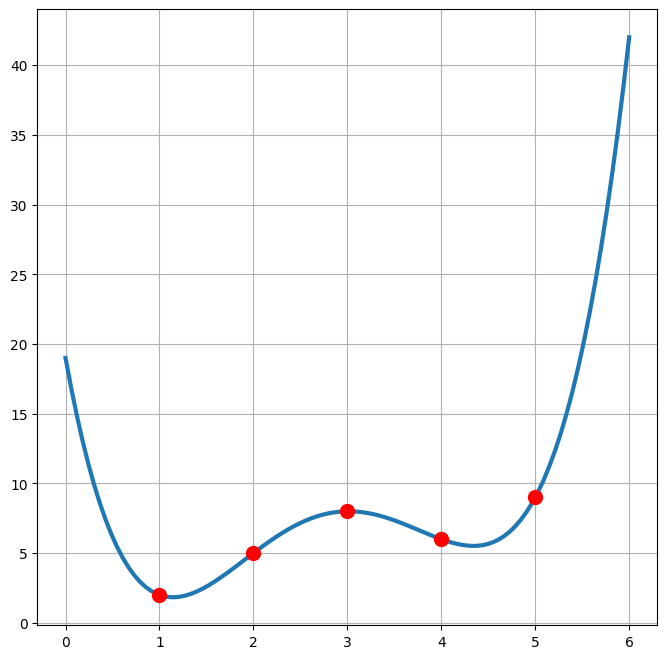

In [ ]:
fig, ax = plt.subplots(figsize= (8, 8))
ax.plot(x, y, lw =3)
ax.scatter([1, 2, 3, 4, 5], [2, 5, 8, 6, 9], s= 100, color = 'red', zorder = 3)
ax.grid()

# <font face="gotham" color="purple"> Solving The System of Linear Equations By NumPy </font>

Set up the system $A  x =  b$, generate a random $A$ and $b$

In [ ]:
A = np.round(10 * np.random.rand(5, 5))
b = np.round(10 * np.random.rand(5,))

In [ ]:
x = np.linalg.solve(A, b); x

array([ 1.16 , -0.507,  1.464, -1.217, -0.409])

Let's verify if $ Ax = b$

In [ ]:
A@x - b

array([-0., -0.,  0.,  0.,  0.])

They are technically zeros, due to some round-off errors omitted, that's why there is $-$ in front $0$.